In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)
x = np.random.uniform(-3, 3, size = 100)
print(x.shape)
X = x.reshape(-1, 1) # when to use X
print(X.shape)
y = 0.5 * x + 3 + np.random.normal(0, 1, size = 100)
print(y.shape)

(100,)
(100, 1)
(100,)


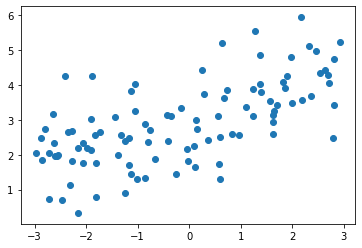

In [3]:
plt.scatter(x, y)
plt.show()

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
def PolynomialRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree = degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression())
    ])

In [5]:
from sklearn.model_selection import train_test_split

np.random.seed(666)
X_train, X_test, y_train, y_test = train_test_split(X, y) #here X

In [6]:
from sklearn.metrics import mean_squared_error

poly_reg = PolynomialRegression(degree = 20)
poly_reg.fit(X_train, y_train)

y_poly_predict = poly_reg.predict(X_test)
mean_squared_error(y_test, y_poly_predict)

167.9401086890128

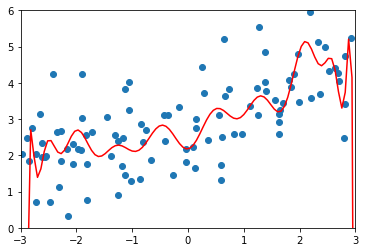

In [7]:
x_plot = np.linspace(-3, 3, 100).reshape(100, 1)
y_plot = poly_reg.predict(x_plot)

plt.scatter(x, y)
plt.plot(x_plot[:, 0], y_plot, color = 'r')
plt.axis([-3, 3, 0, 6])
plt.show()

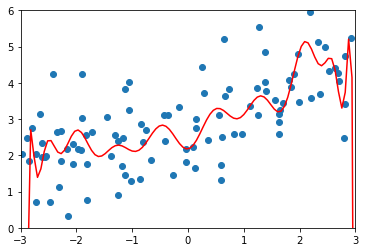

In [8]:
def plot_model(model):
    x_plot = np.linspace(-3, 3, 100).reshape(100, 1)
    y_plot = model.predict(x_plot)

    plt.scatter(x, y)
    plt.plot(x_plot[:, 0], y_plot, color = 'r')
    plt.axis([-3, 3, 0, 6])
    plt.show()
plot_model(poly_reg)

In [9]:
from sklearn.linear_model import Ridge
def RidgeRegression(degree, alpha):
    return Pipeline([
        ("poly", PolynomialFeatures(degree = degree)),
        ("std_scaler", StandardScaler()),
        ("ridge_reg", Ridge(alpha = alpha))
    ])

In [10]:
ridge_reg = RidgeRegression(20, 0.0001)
ridge_reg.fit(X_train, y_train)

ridge_predict = ridge_reg.predict(X_test)
mean_squared_error(y_test, ridge_predict)

1.3233492754155471

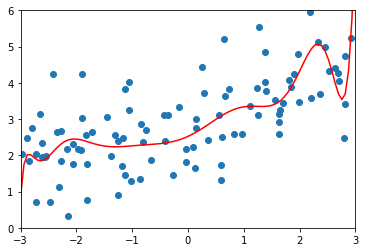

In [12]:
plot_model(ridge_reg)

In [16]:
from sklearn.linear_model import Lasso
def LassoRegression(degree, alpha):
    return Pipeline([
        ("Poly", PolynomialFeatures(degree = degree)),
        ("std_scaler", StandardScaler()),
        ("Lasso_reg", Lasso(alpha = alpha))
    ])

In [18]:
lasso_reg = LassoRegression(20, 0.1)
lasso_reg.fit(X_train, y_train)

y_predict = lasso_reg.predict(X_test)
mean_squared_error(y_test, y_predict)


1.1213911351818648

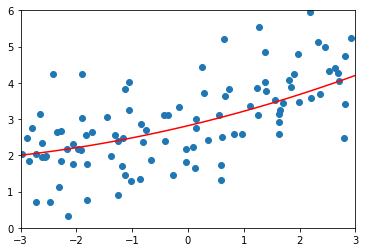

In [19]:
plot_model(lasso_reg)